In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
from IMLearn.learners import UnivariateGaussian, MultivariateGaussian

In [2]:
np.array([1,2,34])

array([ 1,  2, 34])

In [2]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

10.021239404615113 1.135208554762363


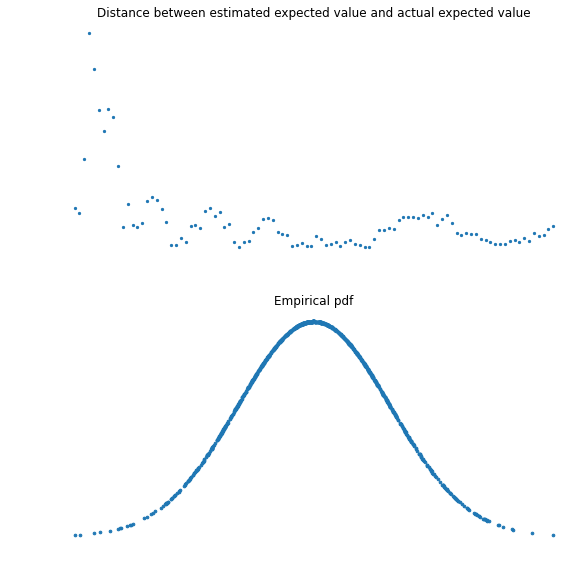

In [3]:
# Question 1 - Draw samples and print fitted model
mu = 10
sigma = 1
num = 1000
X = np.random.normal(mu,sigma,num)
uni_gauss = UnivariateGaussian()
uni_gauss.fit(X)
print(uni_gauss.mu_, uni_gauss.var_)

# Question 2 - Empirically showing sample mean is consistent
fig, (ax1, ax2) = plt.subplots(2,constrained_layout=True,figsize=(8,8))
#fig.tight_layout()
diff = [abs(uni_gauss.fit(X[:i]).mu_ - mu) for i in range(10,num+10,10)]
ax1.set(xlabel='Sample size',ylabel='Absolute distance')
ax1.set_title('Distance between estimated expected value and actual expected value')
ax1.scatter(range(10,num+10,10),diff,s=5)

# Question 3 - Plotting Empirical PDF of fitted model
pdfs = uni_gauss.pdf(X)
ax2.set(xlabel='Sample',ylabel='pdf')
ax2.set_title('Empirical pdf')
ax2.scatter(X,pdfs,s=7)


[0.0094522  0.00833599 4.0163857  0.07377763]
[[ 0.99816355  0.25511561 -0.00355465  0.53183246]
 [ 0.25511561  2.01065857  0.02861877  0.10219353]
 [-0.00355465  0.02861877  0.9881636  -0.0043723 ]
 [ 0.53183246  0.10219353 -0.0043723   1.02863966]]


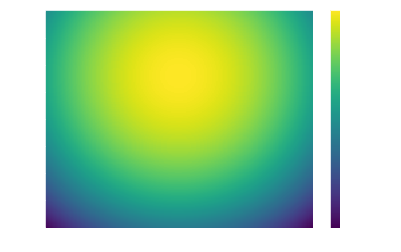

(3.9698492462311563, -0.05025125628140614)

In [31]:
np.random.seed(1)

# Question 4 - Draw samples and print fitted model
mu = np.array([0,0,4,0])
cov = np.array([[1,0.2,0,0.5],
                [0.2,2,0,0],
                [0,0,1,0],
                [0.5,0,0,1]])
X = np.random.multivariate_normal(mu,cov,1000)
multi_gauss = MultivariateGaussian()
multi_gauss.fit(X)
print(multi_gauss.mu_)
print(multi_gauss.cov_)

# Question 5 - Likelihood evaluation
_x, _y = np.linspace(-10,10,200), np.linspace(-10,10,200)
x,y = np.meshgrid(_x,_y,sparse=True)
func = np.vectorize(lambda x,y: multi_gauss.log_likelihood(np.array([x,0,y,0]),cov,X))
heatmap = func(x,y)
plt.pcolormesh(x, y, heatmap)
plt.colorbar()
plt.show()

# Question 6 - Maximum likelihood
xmax, ymax = np.unravel_index(heatmap.argmax(), heatmap.shape)
_x[xmax], _y[ymax]


array([[None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       ...,
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None],
       [None, None, None, ..., None, None, None]], dtype=object)

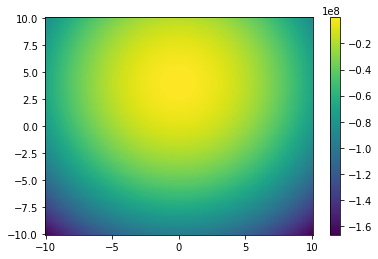

In [25]:
x,y = np.meshgrid(np.linspace(-10,10,200),np.linspace(-10,10,200),sparse=True)
func = np.vectorize(lambda x,y: multi_gauss.log_likelihood(np.array([x,0,y,0]),cov,X))
plt.pcolormesh(x, y, np.vectorize(func)(x,y))
plt.colorbar()
plt.show()

In [3]:
from exercises.fit_gaussian_estimators import test_univariate_gaussian, test_multivariate_gaussian

9.954743292509804 0.9752096659781323


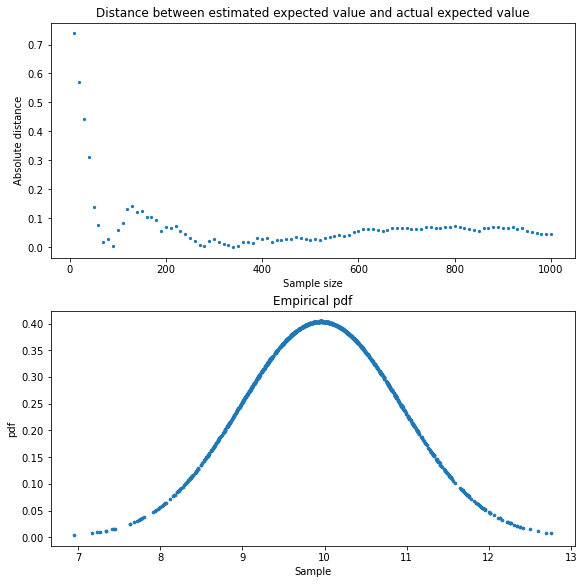

[-0.02282878 -0.04313959  3.9932571  -0.02038981]
[[ 0.91667608  0.16634444 -0.03027563  0.46288271]
 [ 0.16634444  1.9741828  -0.00587789  0.04557631]
 [-0.03027563 -0.00587789  0.97960271 -0.02036686]
 [ 0.46288271  0.04557631 -0.02036686  0.9725373 ]]


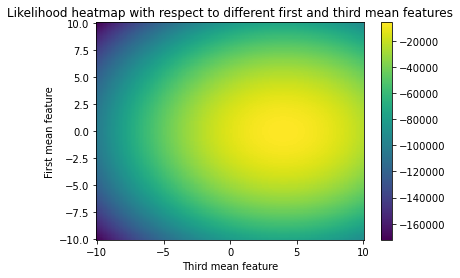

-0.05025125628140614 3.9698492462311563


In [8]:
np.random.seed(0)
test_univariate_gaussian()
test_multivariate_gaussian()

In [47]:
X = np.array([1, 5, 2, 3, 8, -4, -2, 5, 1, 10, -10, 4, 5, 2, 7, 1, 1, 3, 2, -1, -3, 1, -4, 1, 2, 1,
          -4, -4, 1, 3, 2, 6, -6, 8, 3, -6, 4, 1, -2, 3, 1, 4, 1, 4, -2, 3, -1, 0, 3, 5, 0, -2])

UnivariateGaussian.log_likelihood(1,1,X)

-424.78480372664296

In [34]:
mu = 5
sigma = 2
num = 10000
X = np.random.normal(mu,sigma,num)


In [35]:
np.sum(np.abs(X-mu))/10000

1.607135501776489